In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Encounters
Table containing encounter information

In [2]:
encounters_df = pd.read_csv('../../Data/encounters.txt', delimiter = '|')
encounters_df = encounters_df[encounters_df['Age_y'] >= 18]
encounters_df.head()

,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG,FinancialClass,AdmissionOrigin,AdmissionSource,AdmissionType,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass
0,DC0E8447DFE13A,DDA421589DC15F,Female,45,1978-01-14,2023-09-24,2023-09-25,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,Medicare,OR Admission,Self Referred (Home),Routine/Elective,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient
1,D91E787AE2C10E,DE2E02D9604A25,Female,26,1996-09-30,2023-09-18,2023-09-19,O.R. PROCEDURES FOR OBESITY WITH CC,Blue Cross,OR Admission,Physician Referral,Routine/Elective,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient
3,DB99C1A453AA17,D285E636334BC8,Female,39,1984-04-09,2023-09-09,2023-09-21,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Other Government,Transfer Center Admission,Transfer - Outside Emer Dept,Urgent,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,Home or Self Care,Inpatient
4,D04A352A03602A,D374AD9E35B5BA,Male,61,1961-09-18,2023-08-28,2023-09-20,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,Medi-Cal Managed Care,ED Admission,Clinic Referral,Emergency,Alcoholic cirrhosis of liver with ascites (CM...,301555,-1,Home Health Care (Non UCSF),Inpatient
5,D3F8CA2E50DD9D,DC4A8D580423DB,Male,53,1969-10-26,2023-09-24,2023-09-30,LIVER TRANSPLANT WITHOUT MCC,Covered California,Transfer Center Admission,Physician Referral,Urgent,Alcoholic cirrhosis of liver with ascites (CM...,28036959,-1,Home Health Care (Non UCSF),Inpatient


In [3]:
encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   EncounterKey                         160 non-null    object
 1   PatientKey                           160 non-null    object
 2   Sex                                  160 non-null    object
 3   Age_y                                160 non-null    int64 
 4   BirthDate                            160 non-null    object
 5   PtAdmitDate                          160 non-null    object
 6   PtDischargeDate                      160 non-null    object
 7   DRG                                  160 non-null    object
 8   FinancialClass                       160 non-null    object
 9   AdmissionOrigin                      160 non-null    object
 10  AdmissionSource                      160 non-null    object
 11  AdmissionType                        160 non-null 

In [4]:
print(f"The number of unique patients are: {encounters_df['PatientKey'].nunique()}")
print(f"The number of unique encounter keys are: {encounters_df['EncounterKey'].nunique()}")

The number of unique patients are: 160
The number of unique encounter keys are: 160


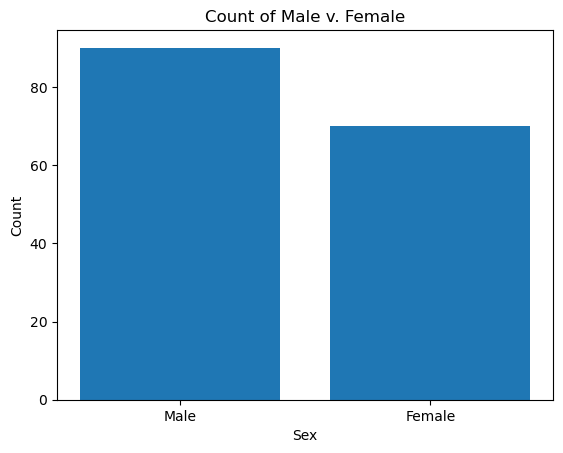

In [5]:
# distribution of sex
sex_dist = encounters_df["Sex"].value_counts()
plt.figure()
plt.bar(sex_dist.index, sex_dist)
plt.title('Count of Male v. Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('./figs/sex.png', transparent = True)
plt.show()

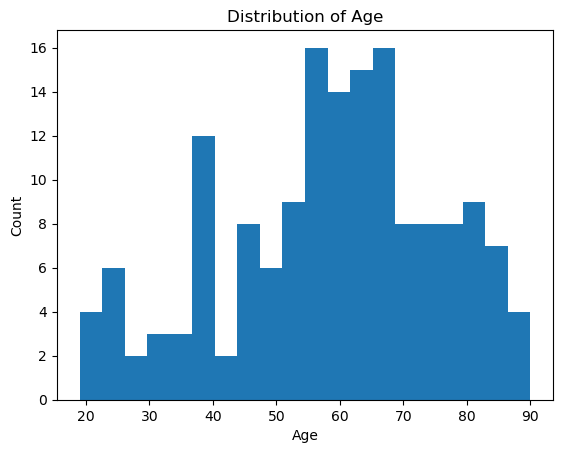

In [6]:
# distribution of age
plt.figure()
plt.hist(encounters_df['Age_y'], bins = 20)
plt.title('Distribution of Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.savefig('./figs/age.png', transparent = True)
plt.show()

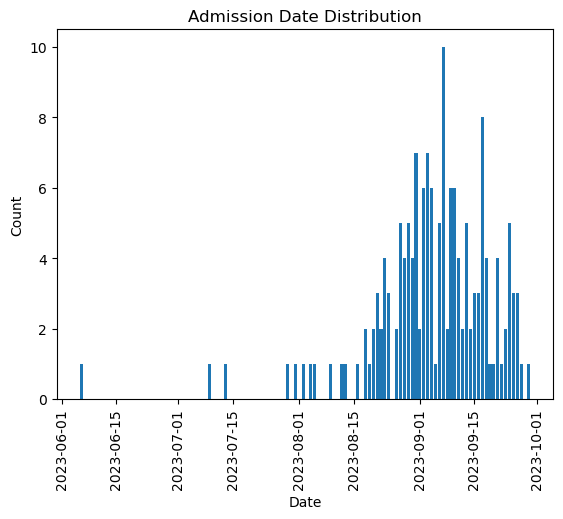

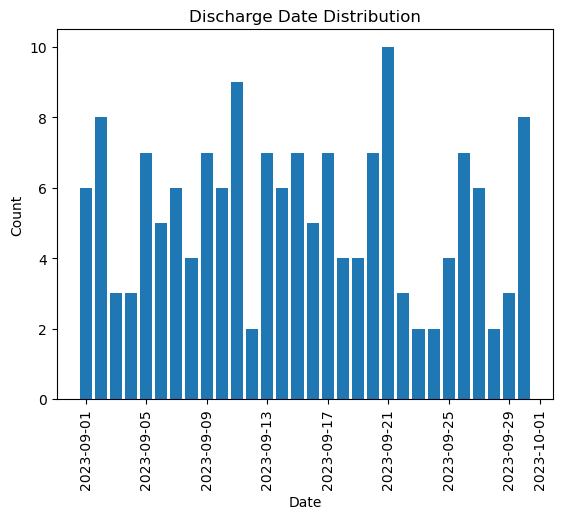

In [63]:
# patient admission date
encounters_df[['PtAdmitDate', 'PtDischargeDate']] = encounters_df[['PtAdmitDate', 'PtDischargeDate']].apply(pd.to_datetime, format = "%Y-%m-%d")

admission_date_counts = encounters_df['PtAdmitDate'].value_counts()
plt.figure()
plt.bar(admission_date_counts.index, admission_date_counts)
plt.xticks(rotation = 90)
plt.title('Admission Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('./figs/admission_date.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

# patient discharge date
discharge_date_counts = encounters_df['PtDischargeDate'].value_counts()
plt.figure()
plt.bar(discharge_date_counts.index, discharge_date_counts)
plt.xticks(rotation = 90)
plt.title('Discharge Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('./figs/discharge_date.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

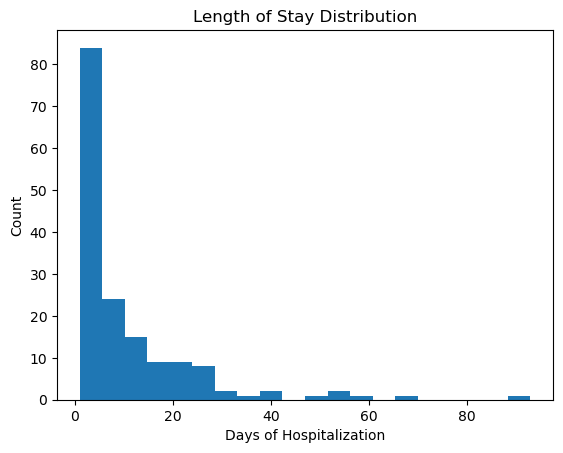

In [61]:
encounters_df['length_of_stay'] = encounters_df['PtDischargeDate'] - encounters_df['PtAdmitDate']
encounters_df['length_of_stay'] = encounters_df['length_of_stay'].apply(lambda x: x.days)
plt.figure()
plt.hist(encounters_df['length_of_stay'], bins = 20)
plt.title('Length of Stay Distribution')
plt.xlabel('Days of Hospitalization')
plt.ylabel('Count')
plt.savefig('./figs/length_of_stay.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()


## DRG Classification

In [8]:
# unique counts of diagnosis-related group
encounters_df['DRG'].value_counts()

DRG
*Unspecified                                                                           8
KIDNEY TRANSPLANT                                                                      8
MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC    7
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                              6
KIDNEY TRANSPLANT WITH HEMODIALYSIS WITHOUT MCC                                        4
                                                                                      ..
DIGESTIVE MALIGNANCY                                                                   1
OPIOID ABUSE AND DEPENDENCE                                                            1
DISORDERS OF PANCREAS EXCEPT MALIGNANCY                                                1
CELLULITIS WITHOUT MCC                                                                 1
OTHER HEART ASSIST SYSTEM IMPLANT                                                      1
Name: count, Leng

In [9]:
drg_df = pd.read_csv('drg_042023_092023.csv')
drg_df.head()

,DRG,MDC,MS,Description
0,1,NaN,P,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
1,2,NaN,P,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
2,3,NaN,P,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...
3,4,NaN,P,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...
4,5,NaN,P,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...


In [10]:
encounters_df = pd.merge(encounters_df, drg_df, left_on = 'DRG', right_on = 'Description', how = "left")
encounters_df = encounters_df.rename(columns={'DRG_y': 'DRG_num', 'DRG_x': 'DRG_description'})
encounters_df.head()

,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG_description,FinancialClass,AdmissionOrigin,...,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass,length_of_stay,DRG_num,MDC,MS,Description
0,DC0E8447DFE13A,DDA421589DC15F,Female,45,1978-01-14,2023-09-24,2023-09-25,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,Medicare,OR Admission,...,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient,1,621.0,10.0,P,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC
1,D91E787AE2C10E,DE2E02D9604A25,Female,26,1996-09-30,2023-09-18,2023-09-19,O.R. PROCEDURES FOR OBESITY WITH CC,Blue Cross,OR Admission,...,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient,1,620.0,10.0,P,O.R. PROCEDURES FOR OBESITY WITH CC
2,DB99C1A453AA17,D285E636334BC8,Female,39,1984-04-09,2023-09-09,2023-09-21,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Other Government,Transfer Center Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,Home or Self Care,Inpatient,12,5.0,NaN,P,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...
3,D04A352A03602A,D374AD9E35B5BA,Male,61,1961-09-18,2023-08-28,2023-09-20,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,Medi-Cal Managed Care,ED Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,301555,-1,Home Health Care (Non UCSF),Inpatient,23,NaN,NaN,NaN,NaN
4,D3F8CA2E50DD9D,DC4A8D580423DB,Male,53,1969-10-26,2023-09-24,2023-09-30,LIVER TRANSPLANT WITHOUT MCC,Covered California,Transfer Center Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,28036959,-1,Home Health Care (Non UCSF),Inpatient,6,6.0,NaN,P,LIVER TRANSPLANT WITHOUT MCC


In [11]:
encounters_df['MDC'] = encounters_df['MDC'].apply(lambda x: 'None' if pd.isna(x) else str(int(x)))
encounters_df.head()

,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG_description,FinancialClass,AdmissionOrigin,...,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass,length_of_stay,DRG_num,MDC,MS,Description
0,DC0E8447DFE13A,DDA421589DC15F,Female,45,1978-01-14,2023-09-24,2023-09-25,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,Medicare,OR Admission,...,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient,1,621.0,10,P,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC
1,D91E787AE2C10E,DE2E02D9604A25,Female,26,1996-09-30,2023-09-18,2023-09-19,O.R. PROCEDURES FOR OBESITY WITH CC,Blue Cross,OR Admission,...,Morbid (severe) obesity due to excess calories...,-1,-1,Home or Self Care,Inpatient,1,620.0,10,P,O.R. PROCEDURES FOR OBESITY WITH CC
2,DB99C1A453AA17,D285E636334BC8,Female,39,1984-04-09,2023-09-09,2023-09-21,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Other Government,Transfer Center Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,Home or Self Care,Inpatient,12,5.0,None,P,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...
3,D04A352A03602A,D374AD9E35B5BA,Male,61,1961-09-18,2023-08-28,2023-09-20,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,Medi-Cal Managed Care,ED Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,301555,-1,Home Health Care (Non UCSF),Inpatient,23,NaN,None,NaN,NaN
4,D3F8CA2E50DD9D,DC4A8D580423DB,Male,53,1969-10-26,2023-09-24,2023-09-30,LIVER TRANSPLANT WITHOUT MCC,Covered California,Transfer Center Admission,...,Alcoholic cirrhosis of liver with ascites (CM...,28036959,-1,Home Health Care (Non UCSF),Inpatient,6,6.0,None,P,LIVER TRANSPLANT WITHOUT MCC


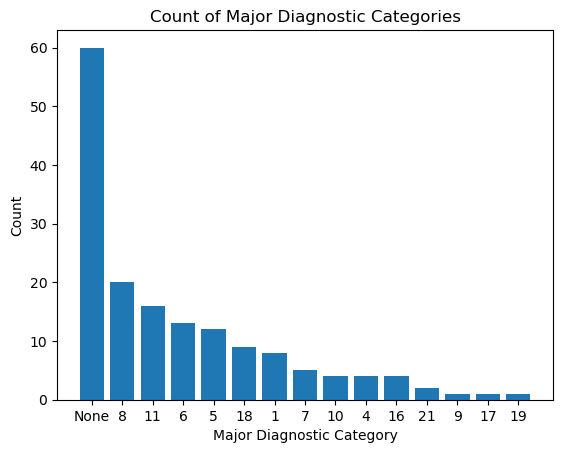

In [12]:
# MDC distribution
mdc_count = encounters_df['MDC'].value_counts()
plt.figure()
plt.bar(mdc_count.index, mdc_count)
plt.title('Count of Major Diagnostic Categories')
plt.xlabel('Major Diagnostic Category')
plt.ylabel('Count')
plt.savefig('./figs/mdc.png', transparent = True)
plt.show()

In [13]:
encounters_df['DRG_description'].value_counts()

DRG_description
*Unspecified                                                                           8
KIDNEY TRANSPLANT                                                                      8
MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC    7
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                              6
KIDNEY TRANSPLANT WITH HEMODIALYSIS WITHOUT MCC                                        4
                                                                                      ..
DIGESTIVE MALIGNANCY                                                                   1
OPIOID ABUSE AND DEPENDENCE                                                            1
DISORDERS OF PANCREAS EXCEPT MALIGNANCY                                                1
CELLULITIS WITHOUT MCC                                                                 1
OTHER HEART ASSIST SYSTEM IMPLANT                                                      1
Name:

## Insurance

In [14]:
# unique financial class (insurance)
encounters_df['FinancialClass'].unique()

array(['Medicare', 'Blue Cross', 'Other Government',
       'Medi-Cal Managed Care', 'Covered California',
       'Covered California Medi-Cal', 'Blue Shield', 'Medicare Advantage',
       'Partnership Managed Medi-Cal', 'Commercial', 'Aetna',
       'Medicare Advantage HMO/Senior', 'Medi-Cal Standard', 'Kaiser',
       "Worker's Comp", 'Alameda Alliance Managed Medi-Cal',
       'United Health Care', 'Capitation', 'Cigna',
       'Partnership Covered California Managed Medi-Cal', 'HealthNet'],
      dtype=object)

## Admission Type

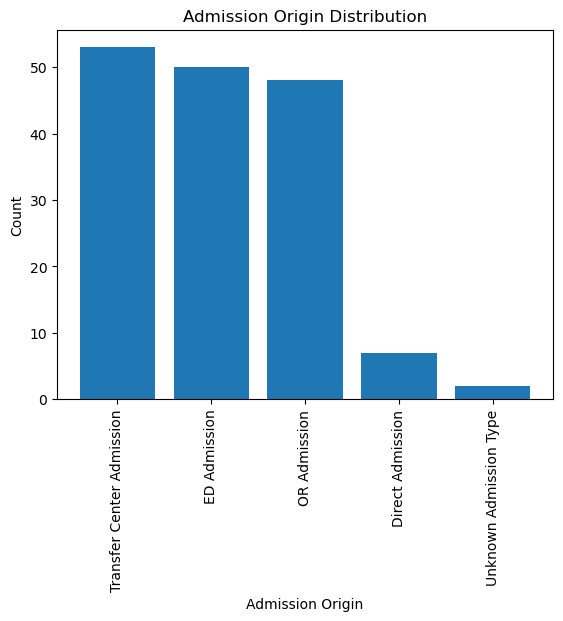

In [15]:
# patient admission origin
admission_origin_count = encounters_df['AdmissionOrigin'].value_counts()
plt.figure()
plt.bar(admission_origin_count.index, admission_origin_count)
plt.title('Admission Origin Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Origin')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_origin.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

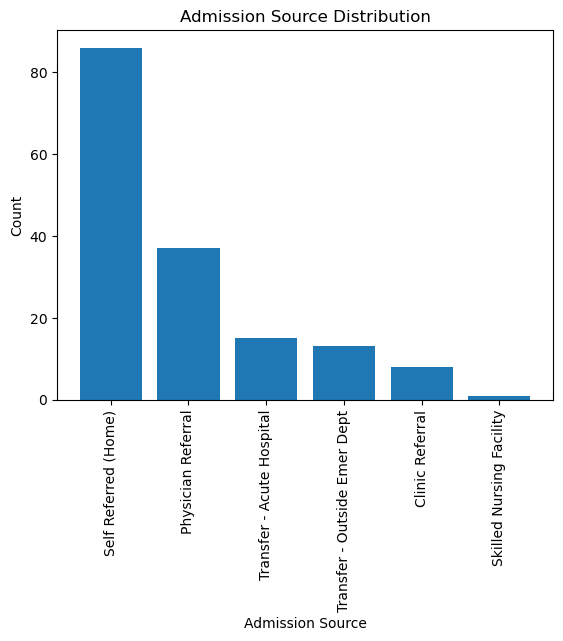

In [16]:
# patient admission source
admission_source_count = encounters_df['AdmissionSource'].value_counts()
plt.figure()
plt.bar(admission_source_count.index, admission_source_count)
plt.title('Admission Source Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Source')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_source.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

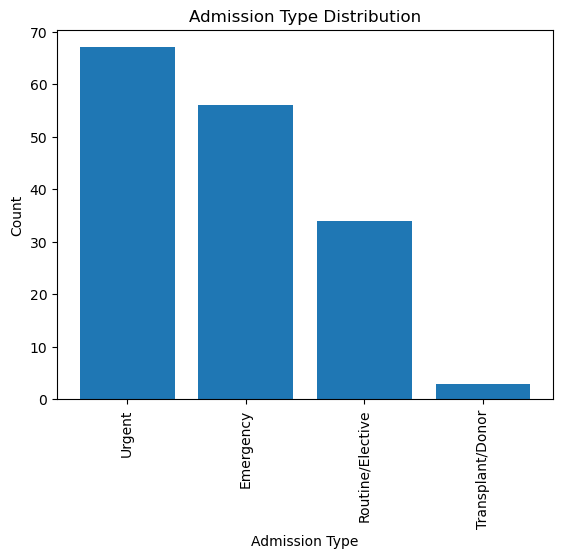

In [17]:
# patient admission type
admission_type_count = encounters_df['AdmissionType'].value_counts()
plt.figure()
plt.bar(admission_type_count.index, admission_type_count)
plt.title('Admission Type Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Type')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_type.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

## Diagnosis Types

In [18]:
encounters_df['PrimaryDx'].unique()

array(['Morbid (severe) obesity due to excess calories  (CMS code)',
       'Alcoholic cirrhosis of liver with ascites  (CMS code)',
       'Other persistent atrial fibrillation  (CMS code)',
       'Unilateral primary osteoarthritis, right knee',
       'Lung transplant rejection  (CMS code)',
       'Sepsis due to methicillin susceptible Staphylococcus aureus  (CMS code)',
       'Aneurysm of vertebral artery (CMS code)',
       'Alcoholic hepatitis with ascites (CMS code)',
       'Other displaced fracture of fifth cervical vertebra, initial encounter for closed fracture  (CMS code)',
       'Benign neoplasm of cerebral meninges  (CMS code)',
       'Acute respiratory failure with hypoxia  (CMS code)',
       'Malignant neoplasm of bladder, unspecified  (CMS code)',
       'Unilateral primary osteoarthritis, right hip',
       'Other postprocedural complications and disorders of digestive system',
       '*Unspecified', 'Other cerebrovascular disease',
       'Unilateral primary ost

In [19]:
# diagnosis combo keys
encounters_df['PresentOnAdmissionDiagnosisComboKey'].unique()

array([      -1, 26757381,   301555, 28036959, 27629048,  5727853,
       28007903,   411704, 28371727,  1726610,  1848960,  1597217,
       26943000, 27494223,  1029141, 27532955,   124480, 27066813,
       22571274, 27295160,  4824839, 22642387,   525844,  1216170,
       27519886, 27033912, 27534457, 27544093, 26721719, 26880546,
       27051514,  3938236,  1866461,   111736,  1233984,  1613930,
       26901358, 28154792,   224411, 26605942,   828507, 26945994,
       26939430, 28162862])

In [20]:
# diagnosis combo keys
encounters_df['HospitalAcquiredDiagnosisComboKey'].unique()

array([      -1, 27635581,  1453511, 18696409,  1844305, 27572782,
         596819,  1628690, 27174338,  3668512, 27520393, 21675435,
       26075603, 27565785,  4716227, 26953019])

## Discharge Type

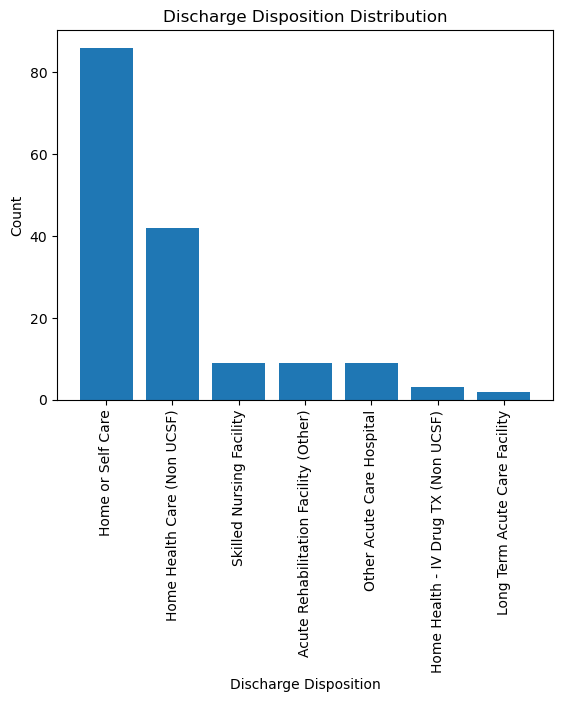

In [21]:
# patient discharge disposition
discharge_disposition_count = encounters_df['DischargeDisposition'].value_counts()
plt.figure()
plt.bar(discharge_disposition_count.index, discharge_disposition_count)
plt.title('Discharge Disposition Distribution')
plt.ylabel('Count')
plt.xlabel('Discharge Disposition')
plt.xticks(rotation = 90)
plt.savefig('./figs/discharge_disposition.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

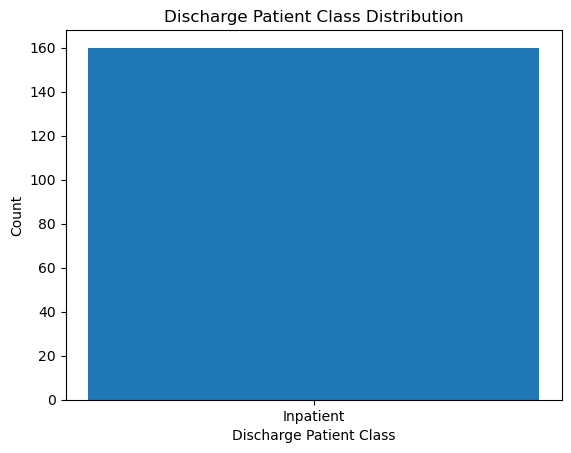

In [22]:
# patient discharge class
discharge_class_count = encounters_df['DischargePatientClass'].value_counts()
plt.figure()
plt.bar(discharge_class_count.index, discharge_class_count)
plt.title('Discharge Patient Class Distribution')
plt.ylabel('Count')
plt.xlabel('Discharge Patient Class')
plt.savefig('./figs/discharge_class.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [23]:
# subset of the encounters_df
encounters_df_subset = encounters_df[['EncounterKey', 'PatientKey', 'Sex', 'Age_y', 'length_of_stay',
                                      'DRG_description', 'PrimaryDx', 'PresentOnAdmissionDiagnosisComboKey', 'HospitalAcquiredDiagnosisComboKey']]

# Present on Admission Diagnosis

In [24]:
unique_encounters = encounters_df['EncounterKey'].unique()
present_on_admit_df = pd.read_csv('../../Data/presentOnAdmitDx.txt', delimiter= "|")
present_on_admit_df_filtered = present_on_admit_df[present_on_admit_df['EncounterKey'].isin(unique_encounters)]
present_on_admit_df_filtered.head()

,EncounterKey,DeidLds,DiagnosisKey,DiagnosisEpicId,Name,EmergencyCareNeededNotPreventablePercentage,EmergencyCareNeededPreventablePercentage,EmergencyPrimaryCareTreatablePercentage,EmergencyNonEmergentPercentage,EmergencyAlcoholUsePercentage,EmergencyDrugUsePercentage,EmergencyInjuryPercentage,EmergencyPsychPercentage,EmergencyUnclassifiedPercentage
4,D00F3A8D5F43B2,deid,126346,211602,Germ cell tumor (CMS code),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,D00F3A8D5F43B2,deid,196992,71791,Retroperitoneal mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,D03868A75BBE62,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,D03F9F35A76C47,deid,253241,288271,At risk for opportunistic infections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,D03F9F35A76C47,deid,552197,203477,Chronic abdominal pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(f"The number of instances of the non-filtered dataframe: {len(present_on_admit_df)}")
print(f"The number of instances of the filtered dataframe: {len(present_on_admit_df_filtered)}")

The number of instances of the non-filtered dataframe: 3187
The number of instances of the filtered dataframe: 263


In [26]:
# deidLds are all the same
present_on_admit_df_filtered['DeidLds'].unique()

array(['deid'], dtype=object)

In [27]:
present_on_admit_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 4 to 3172
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   EncounterKey                                 263 non-null    object 
 1   DeidLds                                      263 non-null    object 
 2   DiagnosisKey                                 263 non-null    int64  
 3   DiagnosisEpicId                              263 non-null    object 
 4   Name                                         263 non-null    object 
 5   EmergencyCareNeededNotPreventablePercentage  0 non-null      float64
 6   EmergencyCareNeededPreventablePercentage     0 non-null      float64
 7   EmergencyPrimaryCareTreatablePercentage      0 non-null      float64
 8   EmergencyNonEmergentPercentage               0 non-null      float64
 9   EmergencyAlcoholUsePercentage                0 non-null      float64
 10  Emerge

In [28]:
# subsetting only necessary columns
present_on_admit_df_filtered = present_on_admit_df_filtered[['EncounterKey', 'DiagnosisKey', 'Name']]

In [37]:
admission_dx_df = pd.merge(encounters_df_subset, present_on_admit_df_filtered, how = "left", on = "EncounterKey")
admission_dx_df = admission_dx_df.rename(columns = {'Name': 'Admission_Dx_Name', 'DiagnosisKey': 'Admission_Dx_Key'})
admission_dx_df.head()

,EncounterKey,PatientKey,Sex,Age_y,length_of_stay,DRG_description,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,Admission_Dx_Key,Admission_Dx_Name
0,DC0E8447DFE13A,DDA421589DC15F,Female,45,1,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,Morbid (severe) obesity due to excess calories...,-1,-1,-1,*Unspecified
1,D91E787AE2C10E,DE2E02D9604A25,Female,26,1,O.R. PROCEDURES FOR OBESITY WITH CC,Morbid (severe) obesity due to excess calories...,-1,-1,-1,*Unspecified
2,DB99C1A453AA17,D285E636334BC8,Female,39,12,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,253241,At risk for opportunistic infections
3,DB99C1A453AA17,D285E636334BC8,Female,39,12,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,292202,Cirrhosis of liver (CMS code)
4,D04A352A03602A,D374AD9E35B5BA,Male,61,23,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,Alcoholic cirrhosis of liver with ascites (CM...,301555,-1,167113,Hyperbilirubinemia


# Hospital Acquired Diagnosis
Diagnosis during hospitalization

In [34]:
hospital_acquired_dx_df = pd.read_csv('../../Data/hospitalAcquiredDx.txt', delimiter = "|")
hospital_acquired_dx_df_filtered = hospital_acquired_dx_df[hospital_acquired_dx_df['EncounterKey'].isin(unique_encounters)]
hospital_acquired_dx_df.head()

,EncounterKey,DeidLds,DiagnosisKey,DiagnosisEpicId,Name,EmergencyCareNeededNotPreventablePercentage,EmergencyCareNeededPreventablePercentage,EmergencyPrimaryCareTreatablePercentage,EmergencyNonEmergentPercentage,EmergencyAlcoholUsePercentage,EmergencyDrugUsePercentage,EmergencyInjuryPercentage,EmergencyPsychPercentage,EmergencyUnclassifiedPercentage
0,D00142C614FA25,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D009F2D78A0374,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D00A78CB35BC4F,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D00D7335431B1F,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D00F3A8D5F43B2,deid,-1,*Unspecified,*Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
print(f"The number of instances of the non-filtered dataframe: {len(hospital_acquired_dx_df)}")
print(f"The number of instances of the filtered dataframe: {len(hospital_acquired_dx_df_filtered)}")

The number of instances of the non-filtered dataframe: 2036
The number of instances of the filtered dataframe: 204


In [36]:
hospital_acquired_dx_df_filtered = hospital_acquired_dx_df_filtered[['EncounterKey', 'DiagnosisKey', 'Name']]
hospital_acquired_dx_df_filtered = hospital_acquired_dx_df_filtered.rename(columns = {'Name': 'HospitalAcquired_Dx_Name', 
                                                                                      'DiagnosisKey': 'HospitalAcquired_Dx_Key'})

In [39]:
hospitalization_dx_df = pd.merge(encounters_df_subset, hospital_acquired_dx_df_filtered, how = "left", on = "EncounterKey")
hospitalization_dx_df.head()

,EncounterKey,PatientKey,Sex,Age_y,length_of_stay,DRG_description,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,HospitalAcquired_Dx_Key,HospitalAcquired_Dx_Name
0,DC0E8447DFE13A,DDA421589DC15F,Female,45,1,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,Morbid (severe) obesity due to excess calories...,-1,-1,-1,*Unspecified
1,D91E787AE2C10E,DE2E02D9604A25,Female,26,1,O.R. PROCEDURES FOR OBESITY WITH CC,Morbid (severe) obesity due to excess calories...,-1,-1,-1,*Unspecified
2,DB99C1A453AA17,D285E636334BC8,Female,39,12,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...,Alcoholic cirrhosis of liver with ascites (CM...,26757381,-1,-1,*Unspecified
3,D04A352A03602A,D374AD9E35B5BA,Male,61,23,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,Alcoholic cirrhosis of liver with ascites (CM...,301555,-1,-1,*Unspecified
4,D3F8CA2E50DD9D,DC4A8D580423DB,Male,53,6,LIVER TRANSPLANT WITHOUT MCC,Alcoholic cirrhosis of liver with ascites (CM...,28036959,-1,-1,*Unspecified


# Orders

In [47]:
orders_df = pd.read_csv('../../Data/orders.txt', delimiter = "|")
orders_df_filtered = orders_df[orders_df['EncounterKey'].isin(unique_encounters)]
orders_df_filtered.head()

,EncounterKey,PatientKey,MedicationOrderKey,OrderDate,OrderName,Frequency,Sig,Quantity,QuantityUnit,DurationDays,Mode,Class,Source,DischargeOrder,Name,PharmaceuticalClass,PharmaceuticalSubclass,TherapeuticClass,AssociatedDiagnosisComboKey,OrderDx
0,D2112F417796CA,D57D16AAE2BEBF,DD7D0486C6D752,2023-09-26,lansoprazole (PREVACID) 30 mg capsule,Daily Scheduled,Take 1 capsule (30 mg total) by mouth daily,90.0,capsule,0.0,Outpatient,Normal,Ord Rec Discharge Review Orders,1,"LANSOPRAZOLE 30 MG CAPSULE,DELAYED RELEASE",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,*Unspecified
1,D25D83C47005E9,D8B4300A7DEB15,D1E677027D578B,2023-09-26,lansoprazole (PREVACID SOLUTAB) 30 mg rapid di...,2 Times Daily Before Meals Scheduled,DEID:D9E3D3FA527815,60.0,tablet,0.0,Outpatient,Normal,Ord Rec Discharge Review Orders,1,"LANSOPRAZOLE 30 MG DELAYED RELEASE,DISINTEGRAT...",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,*Unspecified
2,D25D83C47005E9,D8B4300A7DEB15,DEFCA4E7C0E886,2023-09-26,lansoprazole (PREVACID SOLUTAB) rapid dissolve...,2 Times Daily Before Meals Scheduled,*Not Applicable,NaN,*Not Applicable,0.0,Inpatient,Normal,Manage Orders,0,"LANSOPRAZOLE 30 MG DELAYED RELEASE,DISINTEGRAT...",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,*Unspecified
3,D25D83C47005E9,D8B4300A7DEB15,D7937B21260880,2023-09-26,lansoprazole (PREVACID SOLUTAB) 30 mg rapid di...,2 Times Daily Before Meals Scheduled,DEID:D9E3D3FA527815,60.0,tablet,0.0,Outpatient,Normal,Ord Rec Discharge Review Orders,1,"LANSOPRAZOLE 30 MG DELAYED RELEASE,DISINTEGRAT...",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,*Unspecified
4,DC56E4B13440F4,DCEE4AB5177C06,D1810CE5042577,2023-09-28,pantoprazole (PROTONIX) injection 80 mg,Once,*Not Applicable,NaN,*Not Applicable,0.0,Inpatient,Normal,Manage Orders,0,PANTOPRAZOLE 40 MG INTRAVENOUS SOLUTION,PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,*Unspecified


In [46]:
print(f"The number of instances of the non-filtered dataframe: {len(orders_df)}")
print(f"The number of instances of the filtered dataframe: {len(orders_df_filtered)}")

The number of instances of the non-filtered dataframe: 569
The number of instances of the filtered dataframe: 506


In [48]:
orders_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EncounterKey                 506 non-null    object 
 1   PatientKey                   506 non-null    object 
 2   MedicationOrderKey           506 non-null    object 
 3   OrderDate                    492 non-null    object 
 4   OrderName                    506 non-null    object 
 5   Frequency                    506 non-null    object 
 6   Sig                          464 non-null    object 
 7   Quantity                     163 non-null    float64
 8   QuantityUnit                 506 non-null    object 
 9   DurationDays                 387 non-null    float64
 10  Mode                         506 non-null    object 
 11  Class                        506 non-null    object 
 12  Source                       506 non-null    object 
 13  DischargeOrder           

In [52]:
# the number of unique patient keys here are different than the Encounters table
orders_df_filtered['PatientKey'].nunique()

310

In [53]:
# all medication order keys are unique
orders_df_filtered['MedicationOrderKey'].nunique()

506

/var/folders/wg/np04l4k14h174_2s7j_7h5kw0000gn/T/ipykernel_31516/3797419098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_filtered['OrderDate'] = orders_df_filtered['OrderDate'].apply(pd.to_datetime, format = "%Y-%m-%d")


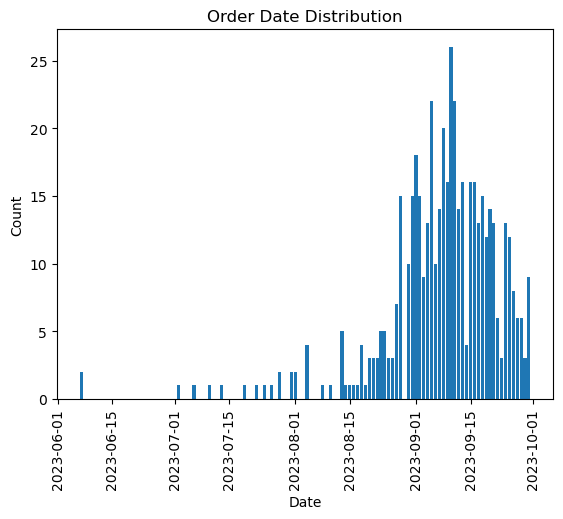

In [56]:
# order date - looking at the span
orders_df_filtered['OrderDate'] = orders_df_filtered['OrderDate'].apply(pd.to_datetime, format = "%Y-%m-%d")
order_date_count = orders_df_filtered['OrderDate'].value_counts()
plt.figure()
plt.bar(order_date_count.index, order_date_count)
plt.title('Order Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90 )
plt.show()


In [64]:
# order name distribution
orders_df_filtered['OrderName'].value_counts()

OrderName
lansoprazole (PREVACID) capsule 30 mg                          134
pantoprazole (PROTONIX) injection 40 mg                         87
lansoprazole (PREVACID) 30 mg capsule                           77
omeprazole (PRILOSEC) 20 mg capsule                             50
lansoprazole (PREVACID SOLUTAB) rapid dissolve tablet 30 mg     47
pantoprazole (PROTONIX) injection 80 mg                         18
pantoprazole (PROTONIX) 40 mg tablet                            17
omeprazole (PRILOSEC) 40 mg capsule                             16
lansoprazole (PREVACID SOLUTAB) 30 mg rapid dissolve tablet     16
lansoprazole (PREVACID) capsule 15 mg                           11
lansoprazole (PREVACID) 15 mg capsule                            9
lansoprazole (PREVACID SOLUTAB) rapid dissolve tablet 15 mg      6
pantoprazole (PROTONIX) 20 mg tablet                             5
pantoprazole (PROTONIX) 4 mg/mL injection                        4
pantoprazole (PROTONIX) 40 mg EC tablet             

In [65]:
# orders frequency
orders_df_filtered['Frequency'].value_counts()

Frequency
Every Morning Before Breakfast Scheduled    188
Daily Scheduled                             165
2 Times Daily Scheduled                      70
2 times daily                                46
Once                                         19
2 Times Daily Before Meals Scheduled         12
*Unspecified                                  3
Twice Daily                                   1
Every Morning Scheduled                       1
2 Times Daily                                 1
Name: count, dtype: int64

In [66]:
# order quantity
orders_df_filtered['Quantity'].value_counts()

Quantity
30.0     109
60.0      24
90.0       9
14.0       5
1.0        3
120.0      3
180.0      2
42.0       1
200.0      1
6.0        1
100.0      1
32.0       1
56.0       1
15.0       1
110.0      1
Name: count, dtype: int64

In [73]:
# order mode
orders_df_filtered['Mode'].value_counts()

Mode
Inpatient     305
Outpatient    201
Name: count, dtype: int64

In [74]:
# order class
orders_df_filtered['Class'].value_counts()

Class
Normal            458
No Print           31
Historical Med     16
Print               1
Name: count, dtype: int64

In [68]:
#order source
orders_df_filtered['Source'].value_counts()

Source
Manage Orders                      169
Ord Rec Discharge Review Orders    125
Ord Rec Discharge New Orders        66
Ord Rec PreTransfer New Orders      56
Modify from Manage Orders           41
Ord Rec Admission New Orders        14
Ord Rec Admission Reorder PTA       14
Ord Rec Admission Review PTA         8
Haiku                                7
*Unspecified                         3
Ord Rec PreTransfer Reorder          2
Medication List                      1
Name: count, dtype: int64

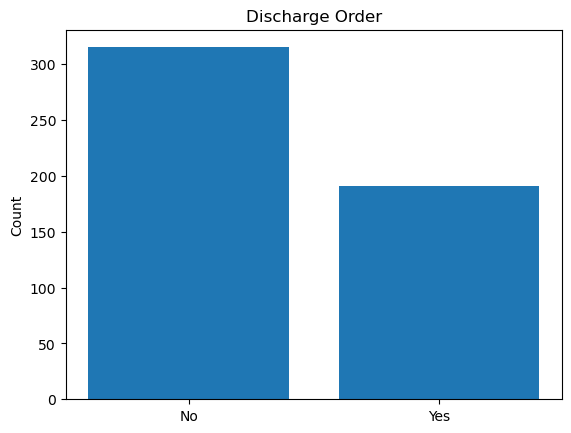

In [71]:
#order discharge
discharge_order_yn = orders_df_filtered['DischargeOrder'].map({0: "No", 1: "Yes"})
discharge_order_yn = discharge_order_yn.value_counts()
plt.figure()
plt.bar(discharge_order_yn.index, discharge_order_yn)
plt.title('Discharge Order')
plt.ylabel('Count')
plt.savefig('./figs/discharge_order.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [75]:
# order pharmaceutical class
orders_df_filtered['PharmaceuticalClass'].value_counts()

PharmaceuticalClass
PROTON-PUMP INHIBITORS    506
Name: count, dtype: int64

In [77]:
# order pharmaceutical subclass
orders_df_filtered['PharmaceuticalSubclass'].value_counts()

PharmaceuticalSubclass
Gastric Acid Secretion Reducer - Proton Pump Inhibitors (PPIs)    506
Name: count, dtype: int64

In [78]:
# order therapeutic class
orders_df_filtered['TherapeuticClass'].value_counts()

TherapeuticClass
GASTROINTESTINAL    506
Name: count, dtype: int64

In [80]:
# order therapeutic class
orders_df_filtered['OrderDx'].value_counts()

OrderDx
*Unspecified                                                                                                                                                                    464
Gastroesophageal reflux disease, unspecified whether esophagitis present                                                                                                          3
Status post total replacement of left hip                                                                                                                                         2
S/P revision of total hip                                                                                                                                                         2
Gastric perforation (CMS code)                                                                                                                                                    2
Aplastic anemia (CMS code)                                                                  

# Note Concepts
Only available at UCSF

In [88]:
note_concepts_df = pd.read_csv('../../Data/noteConcepts.txt', delimiter = "|")
note_concepts_df_filtered = note_concepts_df[note_concepts_df['EncounterKey'].isin(unique_encounters)]
note_concepts_df_filtered.head()

,deid_note_key,EncounterKey,domain,confidence,canon_text
363,D003E527D9D2CB,D4518370C5E32E,signs and symptoms,1.0,In care (finding)
364,D003E527D9D2CB,D4518370C5E32E,signs and symptoms,1.0,Falls
365,D003E527D9D2CB,D4518370C5E32E,signs and symptoms,1.0,Chronic pain
366,D003E527D9D2CB,D4518370C5E32E,signs and symptoms,1.0,Chronic pain
367,D003E527D9D2CB,D4518370C5E32E,signs and symptoms,1.0,Acute onset pain


In [89]:
print(f"The number of instances of the non-filtered dataframe: {len(note_concepts_df)}")
print(f"The number of instances of the filtered dataframe: {len(note_concepts_df_filtered)}")

The number of instances of the non-filtered dataframe: 396979
The number of instances of the filtered dataframe: 7742


# Note Text

In [83]:
note_text_df = pd.read_csv('../../Data/noteText.txt', delimiter = "|")
note_text_df_filtered = note_text_df[note_text_df['EncounterKey'].isin(unique_encounters)]
note_text_df_filtered.head()

,deid_note_key,EncounterKey,NoteText
2,D00015E35CE5B7,DD27EC809E2A28,History of cardiomyopathy presumed secondary t...
60,D000EDBAB41110,D193A58053DE94,ELECTROPHYSIOLOGY CONSULT PROGRESS NOTE 24...
162,D00181CD3DE36F,DE910DFC57730C,Treatment Note Interval History Interval H...
173,D001C2CB94B223,D70969A027A062,NEUROLOGY SERVICE PROGRESS NOTE Interpreter...
472,D00214CCC88914,D70969A027A062,ADVANCED LUNG DISEASE FOLLOW-UP CONSULT NOTE...


In [87]:
print(f"The number of instances of the non-filtered dataframe: {len(note_text_df)}")
print(f"The number of instances of the filtered dataframe: {len(note_text_df_filtered)}")

The number of instances of the non-filtered dataframe: 555249
The number of instances of the filtered dataframe: 9825


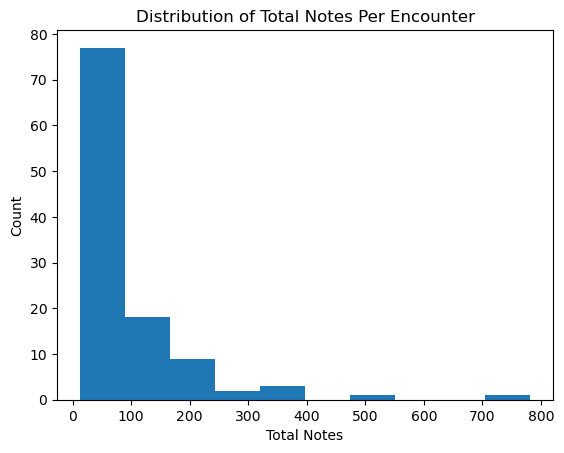

In [91]:
total_notes_dist = note_text_df_filtered['EncounterKey'].value_counts()
plt.figure()
plt.hist(total_notes_dist)
plt.title('Distribution of Total Notes Per Encounter')
plt.ylabel('Count')
plt.xlabel('Total Notes')
plt.savefig('./figs/notes_text_dist.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()